<a href="https://colab.research.google.com/github/SachinLamichhane/Google-Colabs/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install opencv-python

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Defining paths
tuberculosis_path = 'Tuberculosis'
normal_path = 'Normal'

# Function to load images from a directory
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img_resized = cv2.resize(img, (512, 512))
            images.append(img_resized)
            labels.append(label)
    return images, labels

# Load tuberculosis images
tb_images, tb_labels = load_images_from_folder(tuberculosis_path, 1)

# Load normal images
normal_images, normal_labels = load_images_from_folder(normal_path, 0)

# Combine the datasets
images_combined = np.array(tb_images + normal_images)
labels_combined = np.array(tb_labels + normal_labels)

# Normalize the images
images_combined = images_combined / 255.0

# Save combined dataset to avoid reprocessing
np.savez_compressed('combined_data.npz', images=images_combined, labels=labels_combined)

print("Data loaded and preprocessed successfully.")


Data loaded and preprocessed successfully.


In [ ]:
# Load the combined dataset
import numpy as np

data = np.load('combined_data.npz')
images_combined = data['images']
labels_combined = data['labels']

# 1. Distribution of Images
tb_count = sum(labels_combined == 1)
normal_count = sum(labels_combined == 0)
print(f"Tuberculosis images: {tb_count}")
print(f"Normal images: {normal_count}")




Tuberculosis images: 758
Normal images: 3450


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


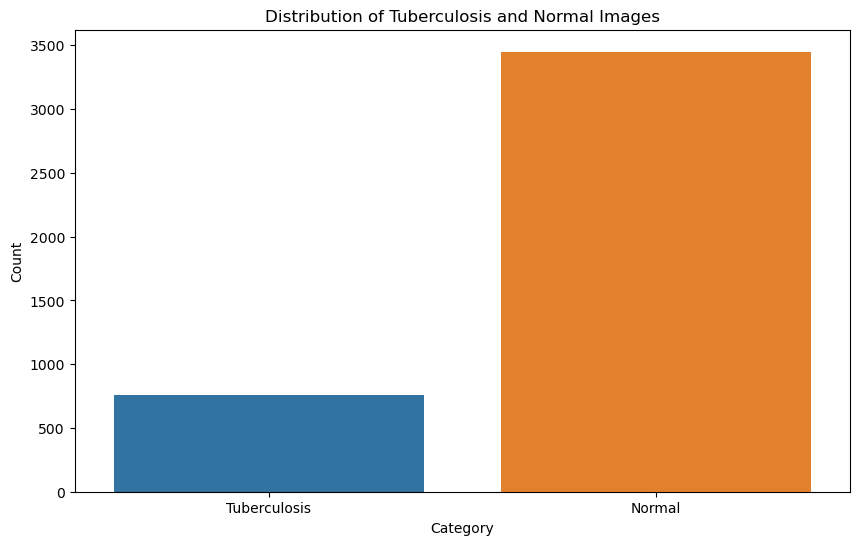

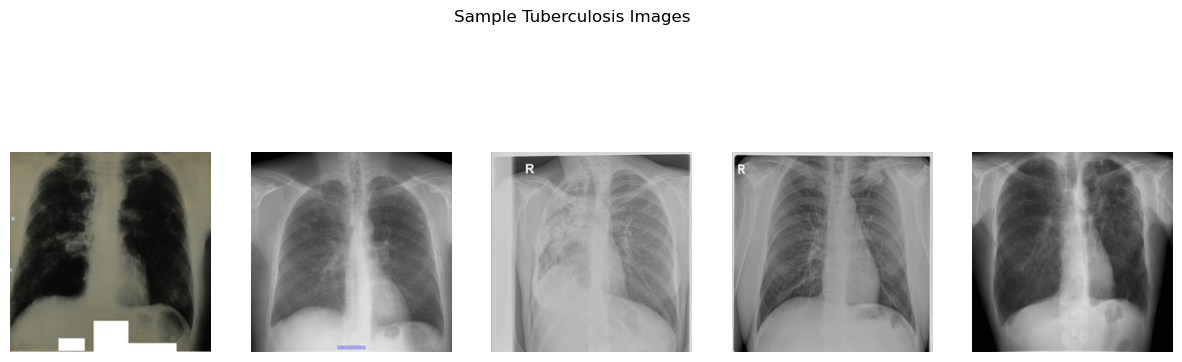

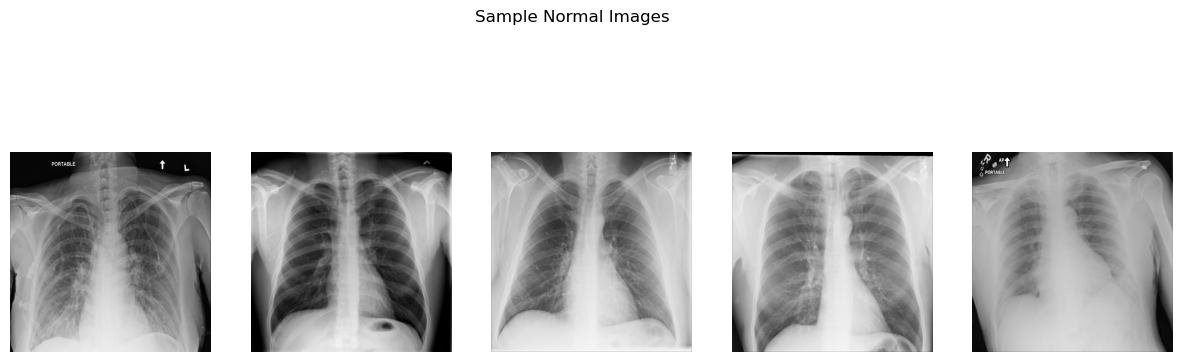

Dimensions of sample Tuberculosis image: (512, 512, 3)
Dimensions of sample Normal image: (512, 512, 3)
Label distribution in combined dataset: {0: 3450, 1: 758}


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


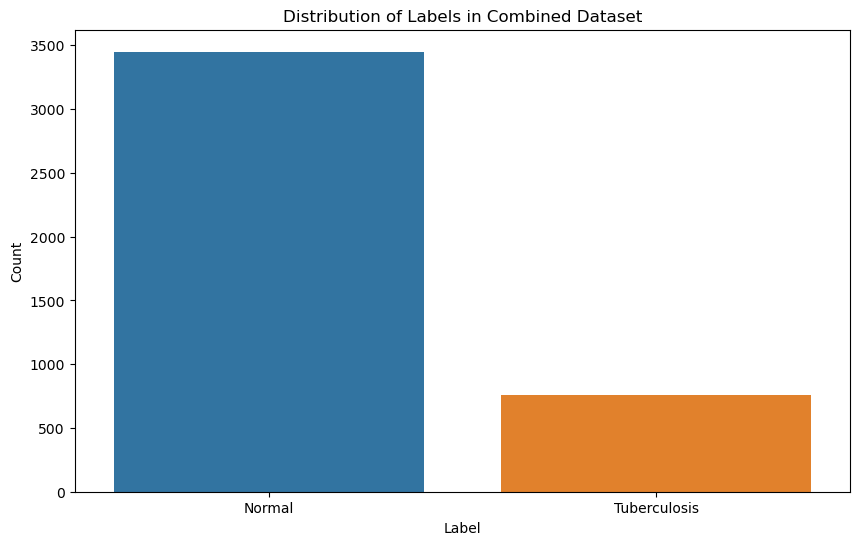

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot the distribution of images
labels = ['Tuberculosis', 'Normal']
counts = [tb_count, normal_count]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.title('Distribution of Tuberculosis and Normal Images')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# 2. Sample Images
def display_sample_images(images, title, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(images_combined[labels_combined == 1], 'Sample Tuberculosis Images')
display_sample_images(images_combined[labels_combined == 0], 'Sample Normal Images')

# 3. Image Dimensions
print(f"Dimensions of sample Tuberculosis image: {images_combined[0].shape}")
print(f"Dimensions of sample Normal image: {images_combined[1].shape}")

# 4. Label Distribution
unique, counts = np.unique(labels_combined, return_counts=True)
label_distribution = dict(zip(unique, counts))
print(f"Label distribution in combined dataset: {label_distribution}")

# Visualize the distribution of labels in the combined dataset
plt.figure(figsize=(10, 6))
sns.barplot(x=list(label_distribution.keys()), y=list(label_distribution.values()))
plt.title('Distribution of Labels in Combined Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Normal', 'Tuberculosis'])
plt.show()